The name column in the CSV should have the name of the test algorithm or what ever
followed by the size of the array tested on.

    Example: "merge-sort10000"

NO spaces in the CSV:

    Example: merge-sort10000,8.603332519531250000,7.480468750000000000,,,892.347
    
    NOT:     merge-sort10000 ; 8.603332519531250000 , 7.480468750000000000 , , , 892.347
    
Then simply name your cell:

    print("Merge sort Data 10000 - 100000")

Diffine the sizes of your arrays:

    sizes = [i*10000 for i in range(1,11)]

Calculate mean time for each array:

    s = meanTimePrDataSize(df, "name", sizes)

And plot the graphs:

    showGraphs(df, s)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dfMB = pd.read_csv("JavaM.csv")


In [3]:
def meanTimePrDataSize(df, name, sizes):
    df.columns = ["Name","PKG","CPU", "GPU" , "DRAM?" , "Time (sec)"]
    d = {}
    for i in range(len(sizes)):
        d[str(sizes[i])] = df[df["Name"] == (name+str(sizes[i]))] ["Time (sec)"].mean()
    
    return pd.Series(data = d)

In [4]:
def showGraphs(df, s):
    plt.plot(df["Time (sec)"],".")
    plt.ylabel('time (ms)')
    plt.xlabel('Measurment NO')
    plt.show()
    
    plt.plot(df["CPU"],".")
    plt.ylabel('Energy (CPU) [J]')
    plt.xlabel('Measurement NO')
    plt.show()
    
    plt.plot(s, ".")
    plt.ylabel('Time (ms)')
    plt.xlabel('Array size')
    plt.show()
    
    sns.set(rc={'figure.figsize':(15,8.27)})
    sns.boxplot(data=df, x='Name', y = 'Time (sec)')

Merge sort Data 10000 - 100000
10000      852.261469
20000      887.338123
30000      922.571028
40000      950.999130
50000      970.380442
60000      985.924438
70000     1008.714600
80000     1028.537030
90000     1047.297830
100000    1068.871310
dtype: float64


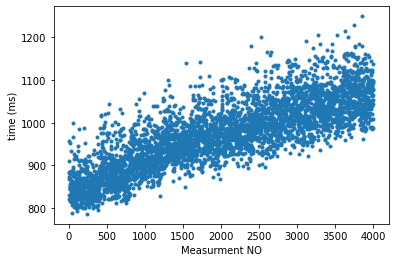

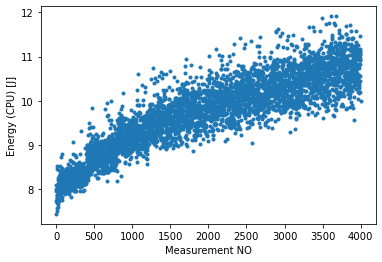

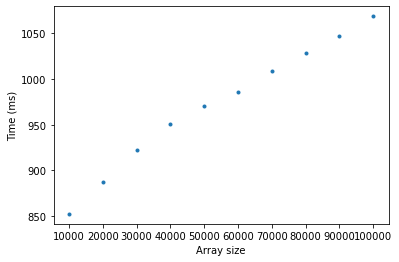

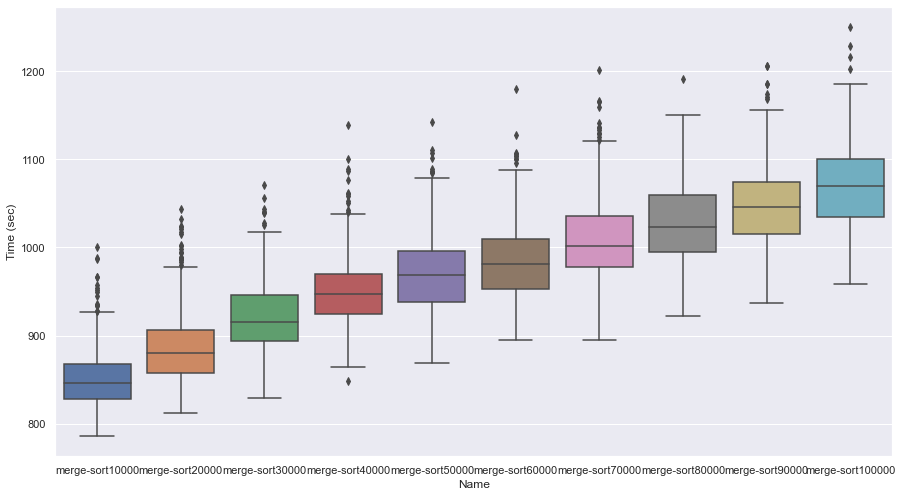

In [5]:
print("Example Merge sort Data 10000 - 100000")
sizes = [i*10000 for i in range(1,11)]
#print(sizes)
s = meanTimePrDataSize(dfMB, "merge-sort", sizes)
print(s)
showGraphs(dfMB, s)